# Lab | Inferential statistics - ANOVA

Useful link: https://people.richland.edu/james/lecture/m170/ch13-1wy.html



## Part 1

In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python.

- **Step 1:** State the Null Hypothesis Ho and the alternative hypothesis H1
- **Step 2:** State the level of significance 
- **Step 3:** Calculate the F statistic
- **Step 4:** Calculate the P-Value
- **Step 5:** Conclude

### Context

Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power.

- State the Null Hypothesis Ho: "The average stching rate is equal for different levels of power"
- State the alternate hypothesis: "Not all the means are equal"
- What is the significance level: "95%, thus alpha=0.05"

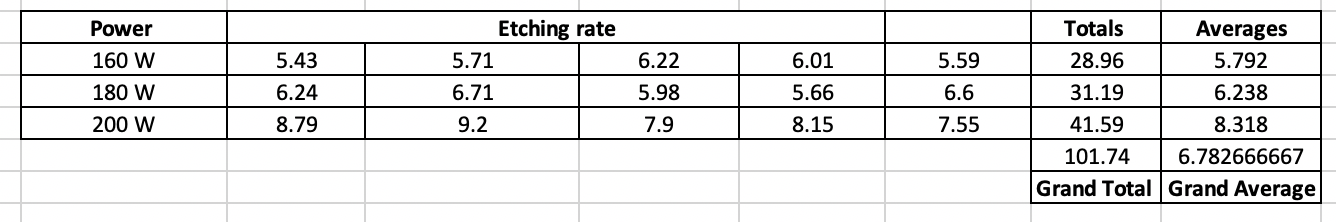

- What are the degrees of freedom of model, error terms, and total DoF: 
    - DoF numerator=3-1=2
    - Dof denumerator=14-3=11
    
- Link to F-tables: http://www.socr.ucla.edu/Applets.dir/F_Table.html
    - F-critical value= 3.5874

Data was collected randomly and provided to you in the table as shown: [link to the image - Data](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png)



## Part 2

- In this section, use the Python to conduct ANOVA.
- What conclusions can you draw from the experiment and why?



In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [66]:
df=pd.read_excel("anova_lab_data.xlsx")
df.columns=["Power","Etching_rate"]
df.head(20)

,Power,Etching_rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [67]:
model = ols('Etching_rate ~ C(Power)',data=df).fit()
table = sm.stats.anova_lm(model)
print(table)

            df     sum_sq   mean_sq          F    PR(>F)
C(Power)   2.0  18.176653  9.088327  36.878955  0.000008
Residual  12.0   2.957240  0.246437        NaN       NaN


Therefore we reject the null hypothesis as F-statistic=36.87 > F-critical value=3.58. Thus, at least one of the means is different

#### Another example

In [68]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
import researchpy as rp

In [70]:
# Recoding value from numeric to string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching_rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [71]:
rp.summary_cont(df['Etching_rate'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Etching_rate,15.0,6.7827,1.2286,0.3172,6.1023,7.4631


In [72]:
rp.summary_cont(df['Etching_rate'].groupby(df['Power']))

,N,Mean,SD,SE,95% Conf.,Interval
Power,,,,,,
160 W,5,5.792,0.3199,0.1431,5.3948,6.1892
180 W,5,6.238,0.4343,0.1942,5.6987,6.7773
200 W,5,8.318,0.6696,0.2995,7.4866,9.1494


In [73]:
import scipy.stats as stats

stats.f_oneway(df['Etching_rate'][df['Power'] == '200 W'],
               df['Etching_rate'][df['Power'] == '180 W'],
               df['Etching_rate'][df['Power'] == '160 W'])

F_onewayResult(statistic=36.87895470100504, pvalue=7.5065842723589115e-06)

We therefore get to the same conclusion, we reject the null hypothesis. At least of of the means is different.